In [3]:
import numpy as np
import os
from PIL import Image
from sklearn import svm
from sklearn.metrics import accuracy_score


In [4]:
def load_images(data_dir):
    X, y = [], []
    classes = os.listdir(data_dir)
    for i, em in enumerate(classes):
        em_dir = os.path.join(data_dir, em)
        for img_name in os.listdir(em_dir): 
            img_path = os.path.join(em_dir, img_name)
            img = Image.open(img_path)
            img_array = np.array(img).flatten() / 255.0
            X.append(img_array)
            y.append(i)
    
    return np.array(X), np.array(y), classes

In [5]:
X_train, y_train, classes = load_images("../data/train")
X_test, y_test, _ = load_images("../data/test")

In [5]:
!pip install catboost -q

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,test_size=0.15,random_state=42,stratify=y_train )

In [7]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=5,
    random_seed=42,
    verbose=10,
    eval_metric='Accuracy',
    early_stopping_rounds=50,
    use_best_model=True
)

model.fit(X_trainn, y_trainn,
    eval_set=(X_val, y_val),
    verbose=10)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"train acc: {train_acc:.3f}")
print(f"test acc: {test_acc:.3f}")

0:	learn: 0.2862060	test: 0.2718830	best: 0.2718830 (0)	total: 1.47s	remaining: 7m 19s
10:	learn: 0.3152610	test: 0.3016020	best: 0.3016020 (10)	total: 13.1s	remaining: 5m 44s
20:	learn: 0.3325137	test: 0.3166938	best: 0.3166938 (20)	total: 24.7s	remaining: 5m 28s
30:	learn: 0.3525121	test: 0.3292315	best: 0.3292315 (29)	total: 37.6s	remaining: 5m 26s
40:	learn: 0.3667732	test: 0.3466450	best: 0.3466450 (40)	total: 52.4s	remaining: 5m 30s
50:	learn: 0.3781657	test: 0.3563966	best: 0.3563966 (50)	total: 1m 6s	remaining: 5m 25s
60:	learn: 0.3869355	test: 0.3628976	best: 0.3633620 (57)	total: 1m 22s	remaining: 5m 22s
70:	learn: 0.3947217	test: 0.3652194	best: 0.3652194 (70)	total: 1m 35s	remaining: 5m 8s
80:	learn: 0.4025900	test: 0.3680056	best: 0.3684699 (78)	total: 1m 49s	remaining: 4m 56s
90:	learn: 0.4101713	test: 0.3693987	best: 0.3724170 (88)	total: 2m 4s	remaining: 4m 46s
100:	learn: 0.4168101	test: 0.3717205	best: 0.3724170 (88)	total: 2m 16s	remaining: 4m 28s
110:	learn: 0.42430

In [8]:
model.save_model('../best_models/catboost_model.cbm')

In [10]:
print(f"My catboost acccuracy is {test_acc:.3f}!")

My catboost acccuracy is 0.424!


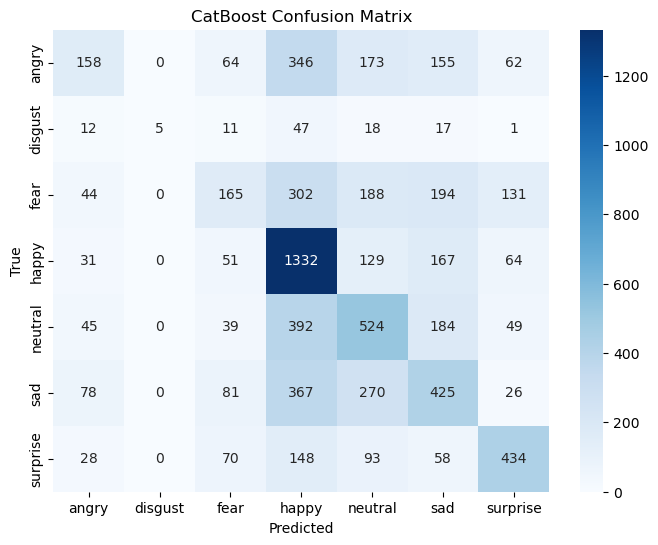

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('CatBoost Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()